<a href="https://colab.research.google.com/github/Jegsaran/Deep-learning/blob/main/Linear_Regression_Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this notebook is to prove Moore's law using NN

# What is Moore's law?

It says that the number of transistors per square inch on integrated circuits doubles approx every two years.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving moore.csv to moore.csv


In [6]:
import pandas as pd
#import io

#df = pd.read_csv(io.BytesIO(uploaded['moore.csv']))
df = pd.read_csv("https://raw.githubusercontent.com/Jegsaran/Deep-learning/main/moore.csv",header=None)
df.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [7]:
df.shape

(162, 2)

Since there is no headers, will use slicing to seperate X & Y

In [36]:
X = df.iloc[:,0]
X.shape

(162,)

For the data to be processed we need the X to be 2D array and Y to be 1D array. So will reshape the X to form a 2D array of size N x D where D=1.

In [37]:
X = df.iloc[:,0].values.reshape(-1,1)
X.shape

(162, 1)

In [38]:
y = df.iloc[:,1]
y.shape
#We can leave y as it is

(162,)

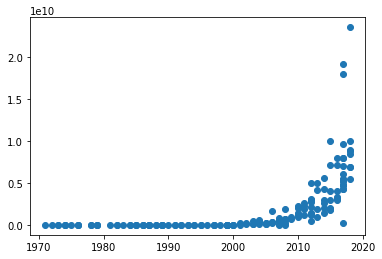

In [39]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

We can see the data is an exponential function. SO inorder to convert it to Linear we can take log

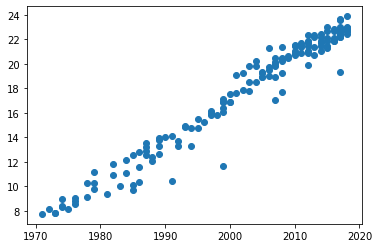

In [40]:
import numpy as np

y = np.log(y)
plt.scatter(X,y)
plt.show()

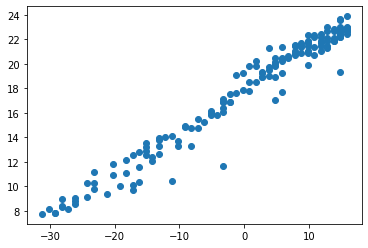

In [41]:
# Let's center the data to perform Linear regression
X = X - X.mean()
plt.scatter(X,y)
plt.show()

Unlike Logistic Regression, where we do classification, we dont need to map "y" to be a number between 0 and 1.

In Linear Regression, the target can be any real number. Hence, we dont use ay Activation function.

Therefore, in Keras, we do use a Dense layer but we pass Activation=None or we can simply omit the argument.

Note: activation=None is the default value

In [42]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape = (1,)))

In [27]:
#model.compile(optimizer="adam", loss="mse")

In [28]:
#r = model.fit(X,y,epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8862
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8745
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8722
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8713
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8719
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8726
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8728
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8708
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8707
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8709
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8714
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8720
Epoch 13/200
6/6 [==============================] - 0s 2ms/st

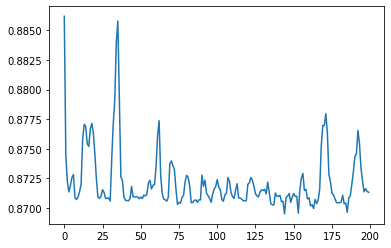

In [29]:
# Plot the loss
#plt.plot(r.history["loss"], label="loss")
#plt.show()

We can observe that the loss has not at all converged.

Initial Learning rate performs well at the begining, but becomes too large by the end. Because of this, the cost jumped up and down, but never converged.

So lets decrease the learning rate depending on the epoch number. This is called as "Learning Rate Scheduling".

In [43]:
#SGD(learning Rate, Momentum)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss="mse")

In [44]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [45]:
#Re-Training the model
mdl = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 396.0630 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 374.5345 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 263.4163 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 242.4336 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 186.4746 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 127.7960 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 84.5966 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 79.0420 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 49.4427 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 34.9997 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 2

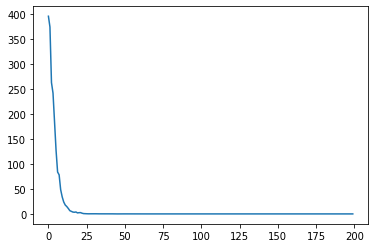

In [46]:
# Plot the loss
plt.plot(mdl.history["loss"], label="loss")
plt.show()

In [47]:
#It looks from the above graph that it has converged.
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33769843]], dtype=float32), array([17.777126], dtype=float32)]


In [48]:
# Slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.33769843

In [49]:
print("Time to double:",np.log(2)/a)

Time to double: 2.0525626397594134


In [50]:
#Predicting the model
Pred =  model.predict(X).flatten()
Pred

array([ 7.241769 ,  7.579468 ,  7.9171658,  7.9171658,  8.254865 ,
        8.254865 ,  8.254865 ,  8.592563 ,  8.930262 ,  8.930262 ,
        8.930262 ,  9.605659 ,  9.605659 ,  9.9433565,  9.9433565,
        9.9433565, 10.618753 , 10.956451 , 10.956451 , 11.29415  ,
       11.631849 , 11.631849 , 11.969547 , 11.969547 , 11.969547 ,
       12.307245 , 12.307245 , 12.307245 , 12.644944 , 12.644944 ,
       12.644944 , 12.644944 , 12.982643 , 12.982643 , 13.320341 ,
       13.320341 , 13.320341 , 13.320341 , 13.658039 , 13.995738 ,
       13.995738 , 14.333436 , 14.333436 , 14.671135 , 14.671135 ,
       15.008833 , 15.008833 , 15.346531 , 16.697325 , 15.346531 ,
       15.68423  , 16.021929 , 16.021929 , 16.021929 , 16.359627 ,
       16.697325 , 16.697325 , 17.035023 , 17.035023 , 16.697325 ,
       16.697325 , 16.697325 , 17.035023 , 17.372723 , 17.372723 ,
       17.71042  , 18.385817 , 18.385817 , 18.723516 , 19.061214 ,
       18.723516 , 19.061214 , 19.398912 , 19.73661  , 18.0481

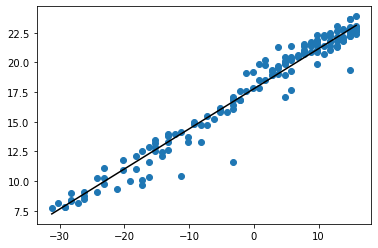

In [51]:
# Make sure that the line fits our data
plt.scatter(X, y)
plt.plot(X, Pred, color="black") # line
plt.show()

#Observation
As expected the best fit line passes through our data points and the time to double the transistor is also 2. Therefore, we have again confirmed that the Moore's law is True.